In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive/Datasets/

/content/drive/MyDrive/Datasets


In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('SampleData.csv')

In [ ]:
df.head()

,Gender,AgeGroup,Height,Weight
0,Male,Adult,5.0,60
1,Female,Adult,6.0,45
2,Male,Elderly,5.2,40
3,Female,Child,4.5,30
4,Male,Child,5.5,28


In [ ]:
df[df.Gender=="Male"].count()

Gender      10
AgeGroup    10
Height      10
Weight      10
dtype: int64

In [ ]:
df.describe()

,Height,Weight
count,24.000000,24.000000
mean,5.200000,45.458333
std,0.673247,16.911481
min,4.000000,23.000000
25%,4.687500,29.500000
50%,5.200000,44.000000
75%,5.800000,55.000000
max,6.500000,90.000000


In [ ]:
sns.set_theme(style='darkgrid')

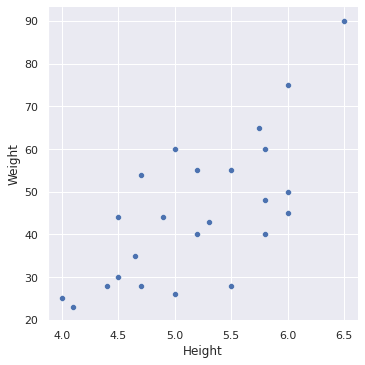

In [ ]:
sns.relplot(data = df,x="Height",y="Weight")

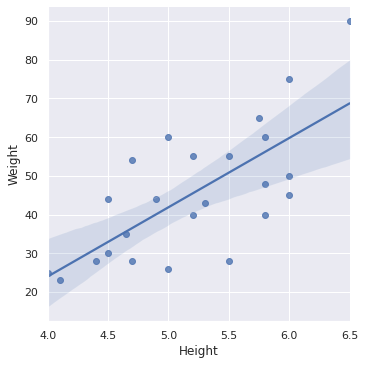

In [ ]:
sns.lmplot(data = df,x="Height",y="Weight")

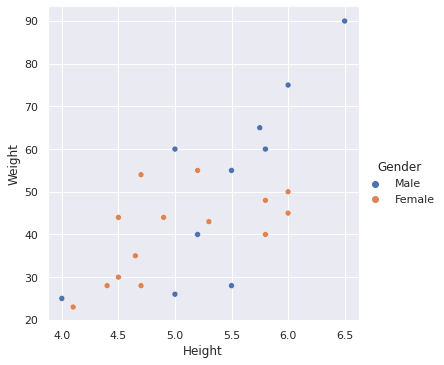

In [ ]:
sns.relplot(data = df,x="Height",y="Weight", hue="Gender")

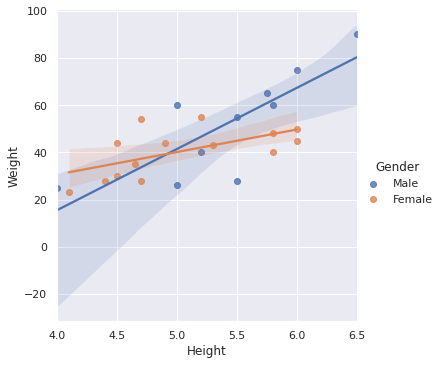

In [ ]:
sns.lmplot(data = df,x="Height",y="Weight", hue="Gender")

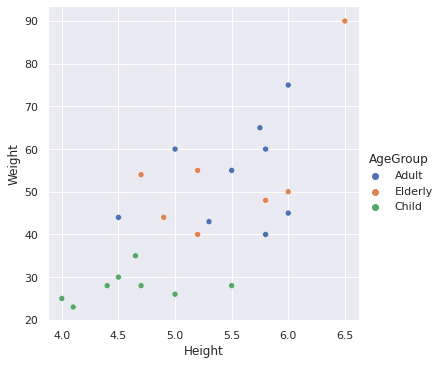

In [ ]:
sns.relplot(data = df,x="Height",y="Weight", hue="AgeGroup")

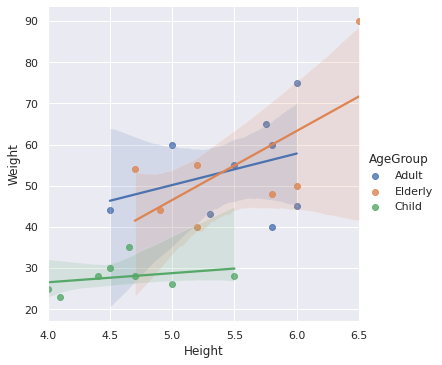

In [ ]:
sns.lmplot(data = df,x="Height",y="Weight", hue="AgeGroup")

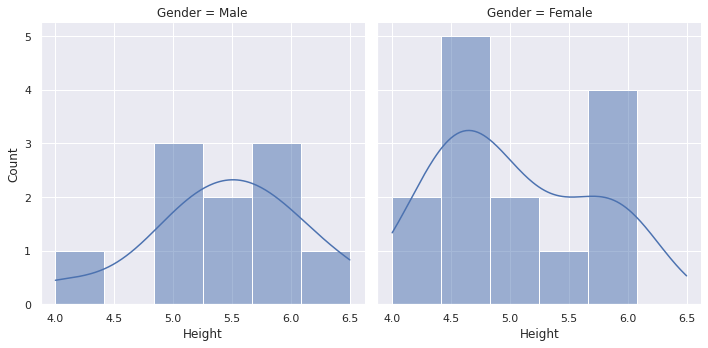

In [ ]:
sns.displot(data=df, x = "Height", col="Gender", kde =True)

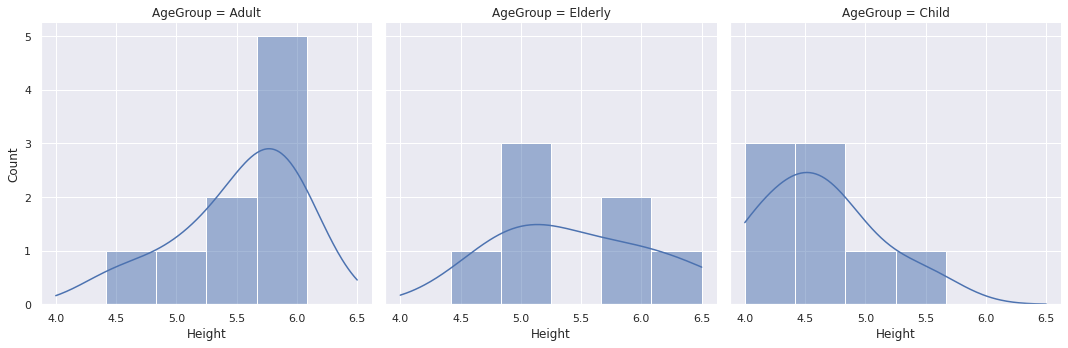

In [ ]:
sns.displot(data=df, x = "Height", col="AgeGroup", kde =True)

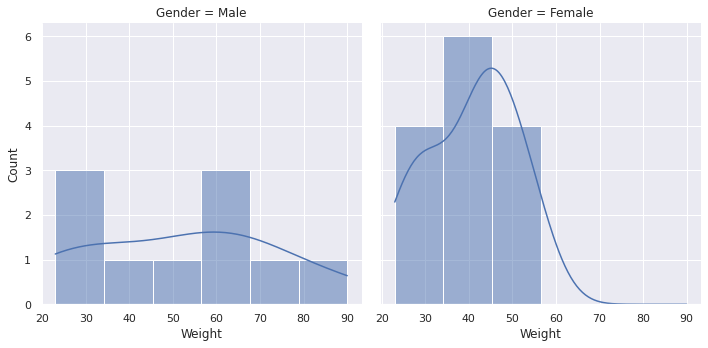

In [ ]:
sns.displot(data=df, x = "Weight", col="Gender", kde =True)

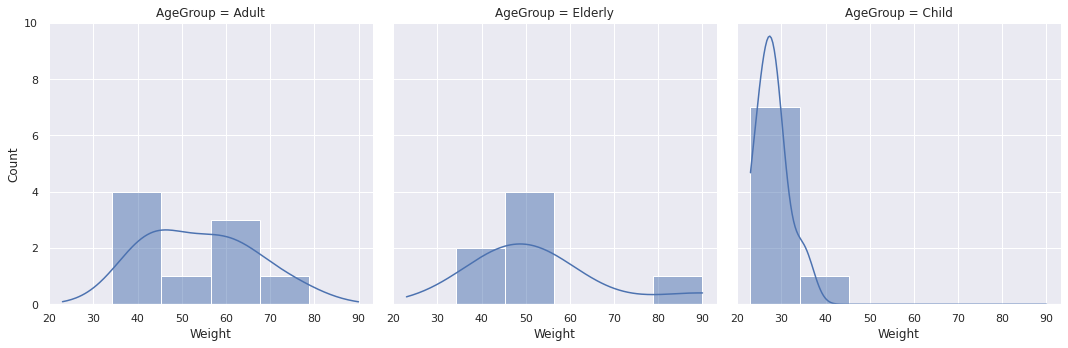

In [ ]:
sns.displot(data=df, x = "Weight", col="AgeGroup", kde =True)

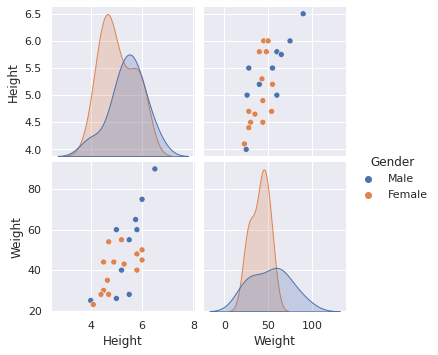

In [ ]:
sns.pairplot(data=df, hue="Gender")

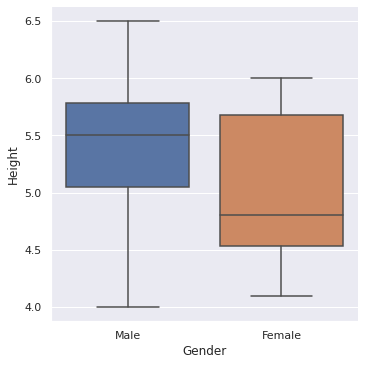

In [ ]:
sns.catplot(data=df, kind="box", x="Gender", y="Height")

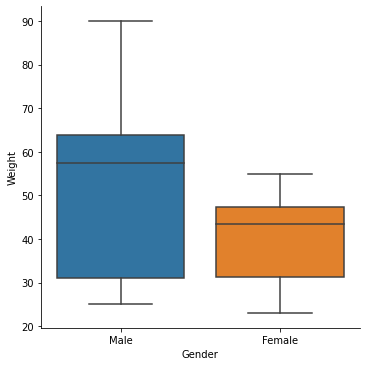

In [ ]:
sns.catplot(data=df, kind="box", x="Gender", y="Weight")

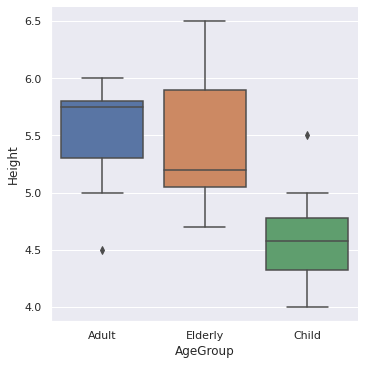

In [ ]:
sns.catplot(data=df, kind="box", x="AgeGroup", y="Height")

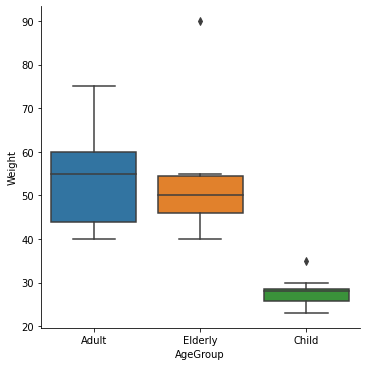

In [ ]:
sns.catplot(data=df, kind="box", x="AgeGroup", y="Weight")

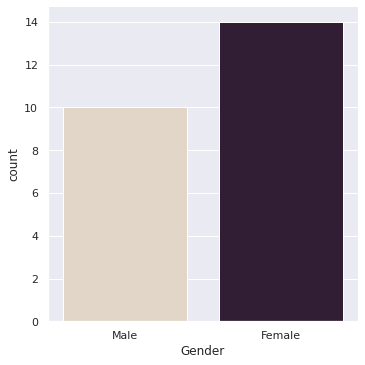

In [ ]:
sns.catplot(data = df, kind="count", x="Gender", palette="ch:.21")

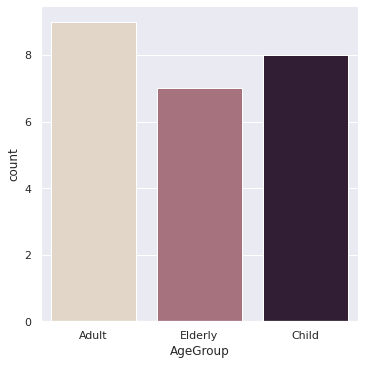

In [ ]:
sns.catplot(data = df, kind="count", x="AgeGroup", palette="ch:.21")

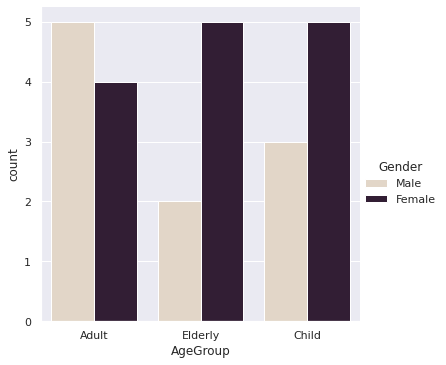

In [ ]:
sns.catplot(data = df, kind="count", x="AgeGroup", hue ="Gender", palette="ch:.21")

In [ ]:
df1 = df[['Gender','AgeGroup']]
df1.head()

,Gender,AgeGroup
0,Male,Adult
1,Female,Adult
2,Male,Elderly
3,Female,Child
4,Male,Child


In [ ]:
!pip install chefboost

In [ ]:
from sklearn import tree

In [ ]:
df2 = df[['Height', 'Weight']]
df2.head()

,Height,Weight
0,5.0,60
1,6.0,45
2,5.2,40
3,4.5,30
4,5.5,28


In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df2, df['Gender'])

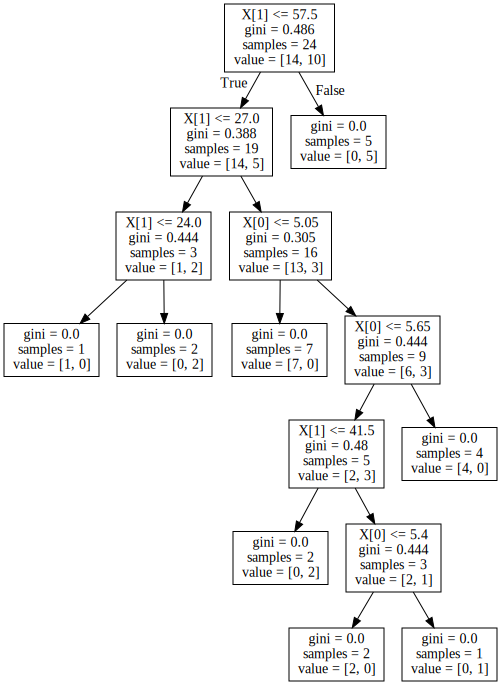

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
df.head()

,Gender,AgeGroup,Height,Weight
0,Male,Adult,5.0,60
1,Female,Adult,6.0,45
2,Male,Elderly,5.2,40
3,Female,Child,4.5,30
4,Male,Child,5.5,28


In [ ]:
column_names = ["AgeGroup", "Height", "Weight", "Gender"]
df11 = df.reindex(columns = column_names)

In [ ]:
df11.head()

,AgeGroup,Height,Weight,Gender
0,Adult,5.0,60,Male
1,Adult,6.0,45,Female
2,Elderly,5.2,40,Male
3,Child,4.5,30,Female
4,Child,5.5,28,Male


In [ ]:
df11=df11.rename(columns={"Gender":"Decision"})

In [ ]:
df11.head()

,AgeGroup,Height,Weight,Decision
0,Adult,5.0,60,Male
1,Adult,6.0,45,Female
2,Elderly,5.2,40,Male
3,Child,4.5,30,Female
4,Child,5.5,28,Male


In [ ]:
from chefboost import Chefboost as chef

In [ ]:
config = {'algorithm':'ID3'}
model = chef.fit(df11,config)

ID3  tree is going to be built...
-------------------------
finished in  0.8021702766418457  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  83.33333333333333 % on  24  instances
Labels:  ['Male' 'Female']
Confusion matrix:  [[6, 0], [4, 14]]
Precision:  100.0 %, Recall:  60.0 %, F1:  75.0 %


In [ ]:
model.items()

dict_items([('trees', [<module 'outputs/rules/rules' from 'outputs/rules/rules.py'>]), ('alphas', []), ('config', {'algorithm': 'ID3', 'enableRandomForest': False, 'num_of_trees': 5, 'enableMultitasking': False, 'enableGBM': False, 'epochs': 10, 'learning_rate': 1, 'max_depth': 3, 'enableAdaboost': False, 'num_of_weak_classifier': 4, 'enableParallelism': False, 'num_cores': 1}), ('nan_values', [['Height', None], ['Weight', None]])])

In [ ]:
config = {'algorithm':'CART'}
model1 = chef.fit(df11,config)

CART  tree is going to be built...
-------------------------
finished in  0.7060065269470215  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  83.33333333333333 % on  24  instances
Labels:  ['Male' 'Female']
Confusion matrix:  [[6, 0], [4, 14]]
Precision:  100.0 %, Recall:  60.0 %, F1:  75.0 %


In [ ]:
config = {'algorithm':'C4.5'}
model2 = chef.fit(df11,config)

C4.5  tree is going to be built...
-------------------------
finished in  0.8143928050994873  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  83.33333333333333 % on  24  instances
Labels:  ['Male' 'Female']
Confusion matrix:  [[6, 0], [4, 14]]
Precision:  100.0 %, Recall:  60.0 %, F1:  75.0 %


In [ ]:
config = {'algorithm':'CHAID'}
model3 = chef.fit(df11,config)

CHAID  tree is going to be built...
-------------------------
finished in  1.6005229949951172  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  87.5 % on  24  instances
Labels:  ['Male' 'Female']
Confusion matrix:  [[7, 0], [3, 14]]
Precision:  100.0 %, Recall:  70.0 %, F1:  82.3529 %


In [ ]:
feature = ['Child',4.5, 40]
prediction = chef.predict(model3, feature)
prediction

'Female'

In [ ]:
model3

{'alphas': [],
 'config': {'algorithm': 'CHAID',
  'enableAdaboost': False,
  'enableGBM': False,
  'enableMultitasking': False,
  'enableParallelism': False,
  'enableRandomForest': False,
  'epochs': 10,
  'learning_rate': 1,
  'max_depth': 3,
  'num_cores': 1,
  'num_of_trees': 5,
  'num_of_weak_classifier': 4},
 'nan_values': [['Height', None]],
 'trees': [<module 'outputs/rules/rules' from 'outputs/rules/rules.py'>]}

In [ ]:
from chefboost.training import Training


In [ ]:
config ={'algorithm':'CHAID'}

In [ ]:
Training.findDecision(df11,config)

('Weight', 24, 6.0822632405221055, 'ChiSquared')

In [ ]:
Training.findGains(df11,config)

{'entropy': 0,
 'gains': {'AgeGroup': 3.0749719722655784,
  'Height': 4.395276760547554,
  'Weight': 6.0822632405221055}}

In [ ]:
tf = pd.read_csv('SampleData2.csv')

In [ ]:
tf.head()

,Outlook,Temp.,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [ ]:
config ={'algorithm':'CHAID'}
Training.findGains(tf,config)

{'entropy': 0,
 'gains': {'Humidity': 3.2071349029490923,
  'Outlook': 4.093338188813542,
  'Temp.': 2.5689141007523464,
  'Wind': 2.0}}

In [ ]:
cmodel = chef.fit(tf,config)

CHAID  tree is going to be built...
-------------------------
finished in  0.6811091899871826  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  14  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[5, 0], [0, 9]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [ ]:
feature = ['Overcast','Mild','High','Weak']
prediction = chef.predict(model, feature)

In [ ]:
prediction

'Yes'

In [ ]:
from sklearn import svm

In [ ]:
sclf= svm.SVC()

In [ ]:
model_svm = sclf.fit(df[["Height","Weight"]],df["Gender"])

In [ ]:
model_svm

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model_svm.predict([[5.6,35]])

array(['Female'], dtype=object)